In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r'/content/PFDA_bank_campaigns.csv', sep=';')

Leemos el dataframe con el separador de ";", porque es un archivo csv, pero no es separado por comas.

## 1. CARGA Y EXPLORACIÓN INICIAL DEL DATASET

In [4]:
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,nr.employed,y
0,0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,5191.0,no
1,1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,5191.0,no
2,2,37.0,NaN,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,5191.0,no
3,3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,5191.0,no
4,4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,5191.0,no


Nos damos cuenta que la primera fila podría ser eliminada, debido a que es un index duplicado.

In [5]:
df = df.drop('Unnamed: 0', axis=1)

Eliminamos la fila, y visualizamos nuevamente el dataframe:

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,5191.0,no
2,37.0,NaN,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,5191.0,no


Vemos las dimensiones del dataset y la informacion de las columnas y los tipos de datos.

In [7]:
# Dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape[0]} filas × {df.shape[1]} columnas")

Dimensiones del dataset: 41188 filas × 17 columnas


In [8]:
print("Información de columnas y tipos de datos:")
print(df.info())

Información de columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          40612 non-null  float64
 1   job          39088 non-null  object 
 2   marital      41188 non-null  object 
 3   education    39912 non-null  object 
 4   default      41188 non-null  object 
 5   housing      41188 non-null  object 
 6   loan         41188 non-null  object 
 7   contact      41188 non-null  object 
 8   month        41188 non-null  object 
 9   day_of_week  41188 non-null  object 
 10  duration     40324 non-null  float64
 11  campaign     41188 non-null  int64  
 12  pdays        41188 non-null  int64  
 13  previous     41188 non-null  int64  
 14  poutcome     41188 non-null  object 
 15  nr.employed  41188 non-null  float64
 16  y            41188 non-null  object 
dtypes: float64(3), int64(3), object(11)
memory usa

Podemos observar que hay valores nulos en algunas variables.

In [9]:
df.isnull().sum()

,0
age,576
job,2100
marital,0
education,1276
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [10]:
df.isnull().mean() * 100

,0
age,1.398466
job,5.098572
marital,0.000000
education,3.097990
default,0.000000
housing,0.000000
loan,0.000000
contact,0.000000
month,0.000000
day_of_week,0.000000


In [11]:
df = df.dropna(subset=['age', 'duration'])

Eliminamos los nullos de las variables numericas para poder hacer analisis exploratorio.

In [12]:
print("Estadísticas descriptivas - Variables Numéricas:")
print(df.describe())

Estadísticas descriptivas - Variables Numéricas:
                age      duration      campaign         pdays      previous  \
count  39756.000000  39756.000000  39756.000000  39756.000000  39756.000000   
mean      40.016174    258.592363      2.569423    962.484128      0.172905   
std       10.415142    259.112332      2.775304    186.888325      0.494199   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    103.000000      1.000000    999.000000      0.000000   
50%       38.000000    180.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      6.000000   

        nr.employed  
count  39756.000000  
mean    5167.019630  
std       72.293521  
min     4963.600000  
25%     5099.100000  
50%     5191.000000  
75%     5228.100000  
max     5228.100000  


In [13]:
print("Estadísticas descriptivas - Variables Categóricas:")
print(df.describe(include='object'))

Estadísticas descriptivas - Variables Categóricas:
           job  marital          education default housing   loan   contact  \
count    37742    39756              38529   39756   39756  39756     39756   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq      9508    24065              11365   31467   20864  32778     25245   

        month day_of_week     poutcome      y  
count   39756       39756        39756  39756  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13258        8322        34326  35269  


## 2. EVALUACIÓN DE CALIDAD DE DATOS

In [14]:
print("Análisis de Duplicados:")
duplicados = df.duplicated().sum()
print(f"   - Total de registros duplicados: {duplicados}")
print(f"   - Porcentaje de duplicados: {(duplicados/len(df)*100):.2f}%")

Análisis de Duplicados:
   - Total de registros duplicados: 11
   - Porcentaje de duplicados: 0.03%


In [15]:
df.drop_duplicates(inplace=True)

Observamos que había 11 duplicados y los eliminamos.

Revisamos que en las columnas existe el valor unknown, que es similar a un null.

In [16]:
df[df.isin(['unknown']).any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,nr.employed,y
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,198.0,1,999,0,nonexistent,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217.0,1,999,0,nonexistent,5191.0,no
10,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,55.0,1,999,0,nonexistent,5191.0,no
15,54.0,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,174.0,1,999,0,nonexistent,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34.0,technician,married,unknown,no,yes,no,cellular,nov,tue,162.0,2,999,2,failure,4963.6,no
41120,60.0,admin.,married,unknown,no,no,no,cellular,nov,tue,333.0,2,999,0,nonexistent,4963.6,no
41122,34.0,technician,married,unknown,no,no,no,cellular,nov,tue,985.0,3,999,0,nonexistent,4963.6,yes
41135,54.0,technician,married,unknown,no,yes,no,cellular,nov,thu,222.0,1,999,1,failure,4963.6,no


In [17]:
(df == 'unknown').sum()

,0
age,0
job,308
marital,80
education,1635
default,8285
housing,956
loan,956
contact,0
month,0
day_of_week,0


In [18]:
(df == 'unknown').mean()*100

,0
age,0.000000
job,0.774940
marital,0.201283
education,4.113725
default,20.845389
housing,2.405334
loan,2.405334
contact,0.000000
month,0.000000
day_of_week,0.000000


Obtenemos el porcentaje, y la columna default tiene un 20%, siendo bastante alto.

Vamos a reemplazar los null por valores unknown, debido a que el valor unknown fue colocado con intención en las columnas categoricas.

In [19]:
df.fillna('unknown', inplace=True)

In [20]:
print("Análisis de Valores Faltantes:")
(df == 'unknown').mean()*100

Análisis de Valores Faltantes:


,0
age,0.000000
job,5.842244
marital,0.201283
education,7.200906
default,20.845389
housing,2.405334
loan,2.405334
contact,0.000000
month,0.000000
day_of_week,0.000000


Vemos que tenemos 8 columnas con valores unknown, donde resaltan:
Default con 20.87%
Education con 7.20%
Job con 5.86%
Siendo valores altos

In [21]:
print("Análisis de Outliers (Variables Numéricas):")
print("Usando el método del Rango Intercuartílico (IQR):")

columnas_numericas = df.select_dtypes(include=[np.number]).columns

outliers_resumen = []

for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.5)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    num_outliers = len(outliers)
    pct_outliers = (num_outliers / len(df)) * 100

    outliers_resumen.append({
        'Variable': col,
        'Q1': Q1,
        'Q2':Q2,
        'Q3': Q3,
        'IQR': IQR,
        'Límite Inferior': limite_inferior,
        'Límite Superior': limite_superior,
        'Num. Outliers': num_outliers,
        'Porcentaje': f"{pct_outliers:.2f}%"
    })

df_outliers = pd.DataFrame(outliers_resumen)
print(df_outliers.to_string(index=False))

Análisis de Outliers (Variables Numéricas):
Usando el método del Rango Intercuartílico (IQR):
   Variable     Q1     Q2     Q3   IQR  Límite Inferior  Límite Superior  Num. Outliers Porcentaje
        age   32.0   38.0   47.0  15.0              9.5             69.5            451      1.13%
   duration  103.0  180.0  320.0 217.0           -222.5            645.5           2856      7.19%
   campaign    1.0    2.0    3.0   2.0             -2.0              6.0           2335      5.87%
      pdays  999.0  999.0  999.0   0.0            999.0            999.0           1462      3.68%
   previous    0.0    0.0    0.0   0.0              0.0              0.0           5430     13.66%
nr.employed 5099.1 5191.0 5228.1 129.0           4905.6           5421.6              0      0.00%


## 3. ANÁLISIS DE DISTRIBUCIÓN DE VARIABLES

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000'),
  Text(0, 40000.0, '40000')])

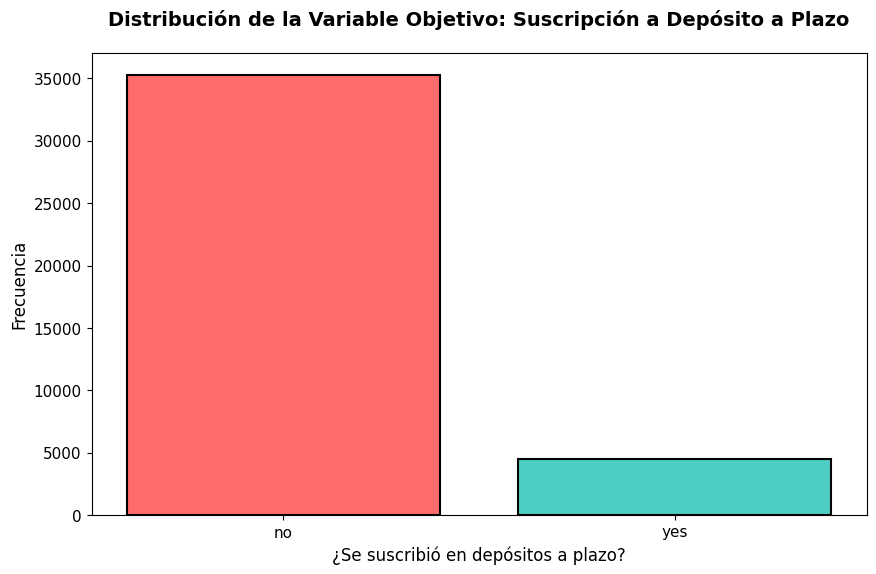

In [22]:
plt.figure(figsize=(10, 6))
target_counts = df['y'].value_counts()
colors = ['#ff6b6b', '#4ecdc4']
plt.bar(target_counts.index, target_counts.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribución de la Variable Objetivo: Suscripción a Depósito a Plazo',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('¿Se suscribió en depósitos a plazo?', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

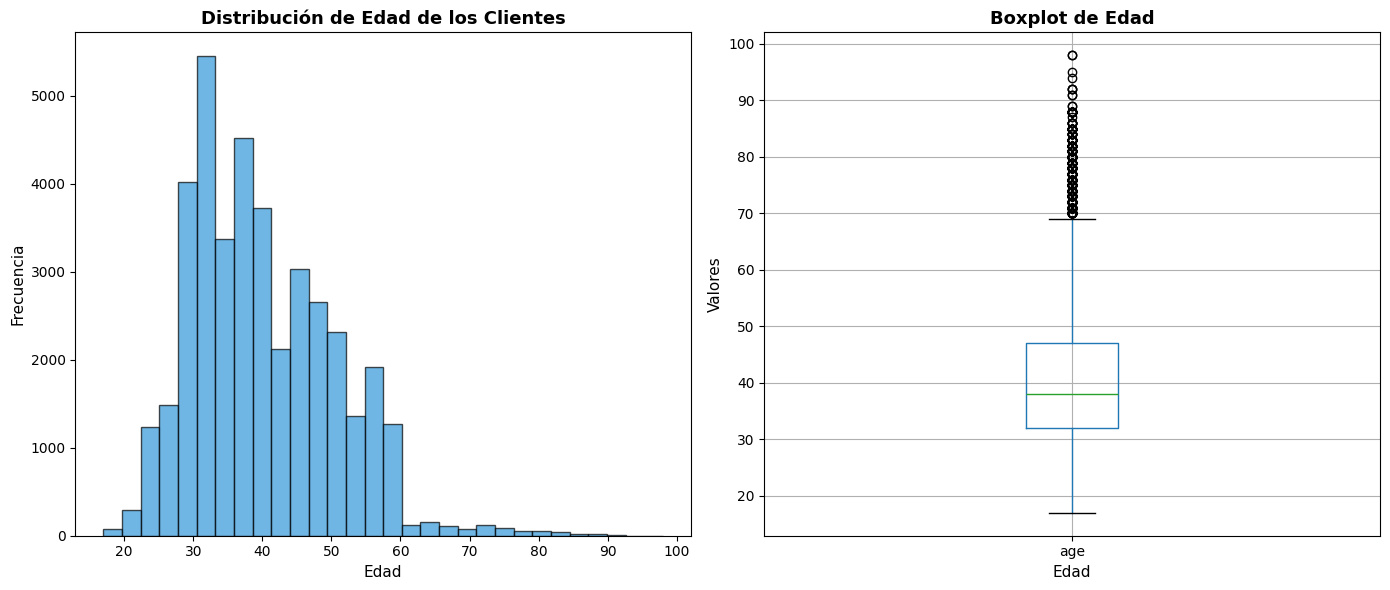

In [23]:
plt.figure(figsize=(14, 6))

# Gráfico 1: Histograma
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Distribución de Edad de los Clientes', fontsize=13, fontweight='bold')
plt.xlabel('Edad', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)

# Gráfico 2: Boxplot
plt.subplot(1, 2, 2)
df[['age']].boxplot(figsize=(10,5))
plt.title('Boxplot de Edad', fontsize=13, fontweight='bold')
plt.xlabel('Edad', fontsize=11)
plt.ylabel('Valores', fontsize=11)

plt.tight_layout()
plt.show()

Podemos observar que la variable edad tiene gran cantidad de valores atipicos (451), en este caso superan el limite superior, que es 69.5.

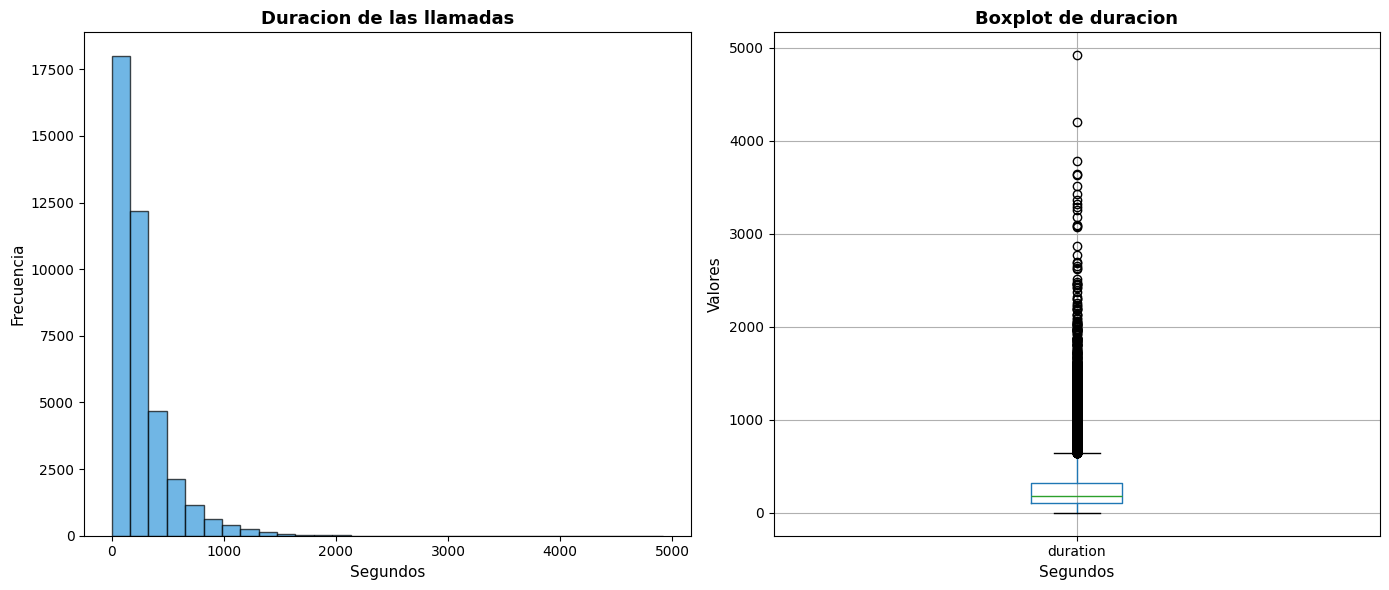

In [24]:
plt.figure(figsize=(14, 6))

# Gráfico 1: Histograma
plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Duracion de las llamadas', fontsize=13, fontweight='bold')
plt.xlabel('Segundos', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)

# Gráfico 2: Boxplot
plt.subplot(1, 2, 2)
df[['duration']].boxplot(figsize=(10,5))
plt.title('Boxplot de duracion', fontsize=13, fontweight='bold')
plt.xlabel('Segundos', fontsize=11)
plt.ylabel('Valores', fontsize=11)

plt.tight_layout()
plt.show()

Vemos que en su mayoría las llamdas suelen durar menos de 300 segundos, habiendo excepciones en llamadas que superan el límite superior que son 645 segundos, 10 minutos.

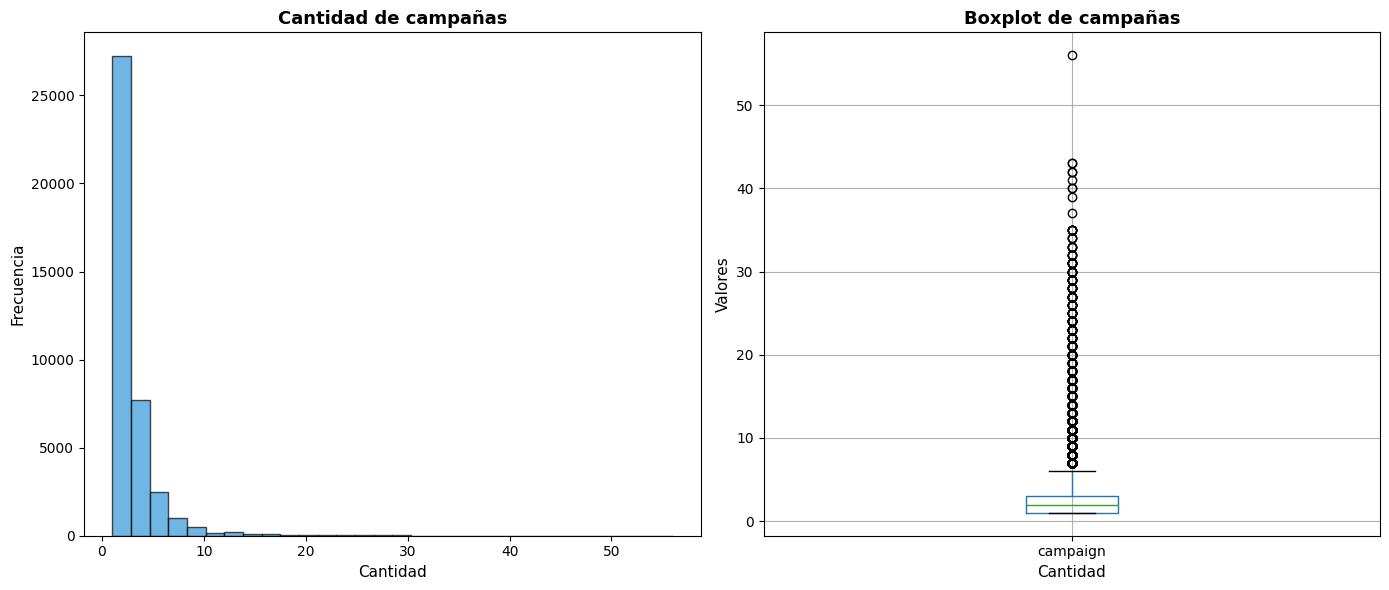

In [25]:
plt.figure(figsize=(14, 6))

# Gráfico 1: Histograma
plt.subplot(1, 2, 1)
plt.hist(df['campaign'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
plt.title('Cantidad de campañas', fontsize=13, fontweight='bold')
plt.xlabel('Cantidad', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)

# Gráfico 2: Boxplot
plt.subplot(1, 2, 2)
df[['campaign']].boxplot(figsize=(10,5))
plt.title('Boxplot de campañas', fontsize=13, fontweight='bold')
plt.xlabel('Cantidad', fontsize=11)
plt.ylabel('Valores', fontsize=11)

plt.tight_layout()
plt.show()

Vemos que en su mayoría los clientes fueron contactados 3-4 veces por campaña.
Observamos valores muy altos, superior a 10 veces, son valores que se deben analizar.

<Figure size 1400x700 with 0 Axes>

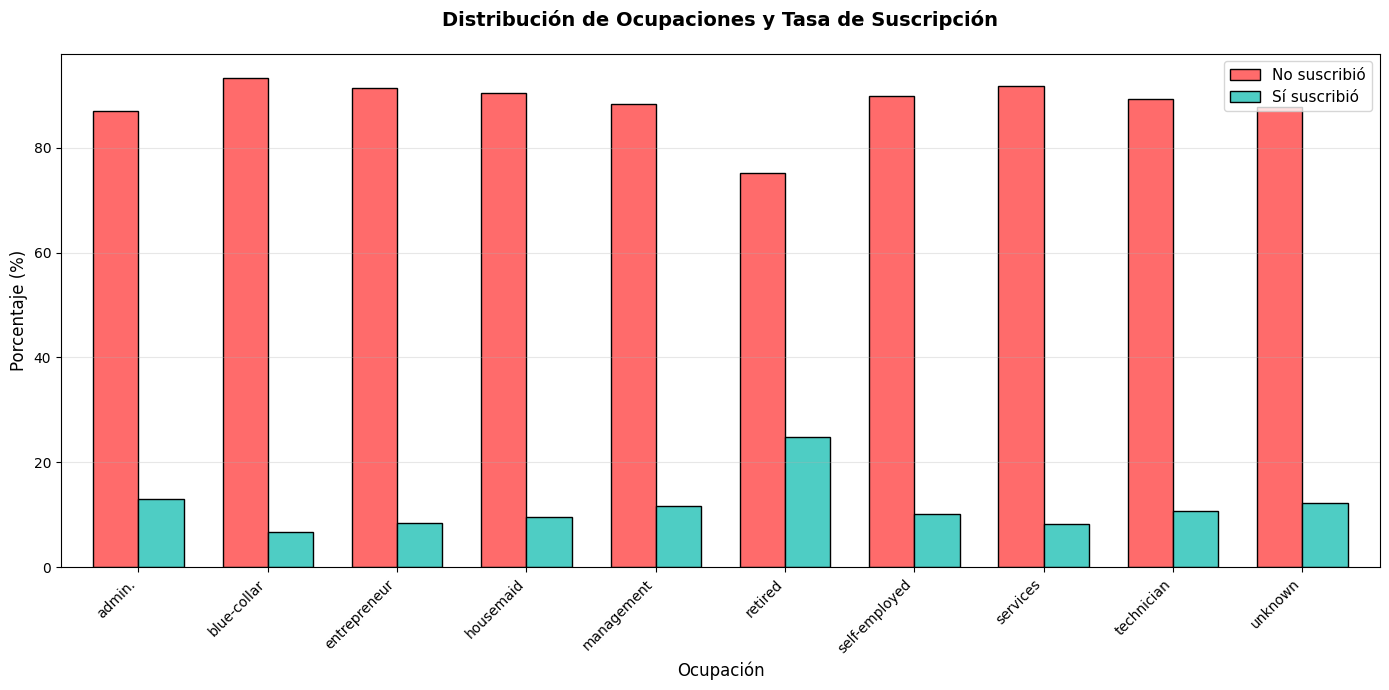

In [26]:
plt.figure(figsize=(14, 7))

job_order = df['job'].value_counts().head(10).index
job_target = df[df['job'].isin(job_order)].groupby(['job', 'y']).size().unstack(fill_value=0)

job_target_pct = job_target.div(job_target.sum(axis=1), axis=0) * 100

ax = job_target_pct.plot(kind='bar', stacked=False, color=['#ff6b6b', '#4ecdc4'],
                          figsize=(14, 7), width=0.7, edgecolor='black', linewidth=1)
plt.title('Distribución de Ocupaciones y Tasa de Suscripción', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Ocupación', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(['No suscribió', 'Sí suscribió'], fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Observamos qne las personas con ocupacion de retirado son los que mas se suscriben.

/tmp/ipython-input-3705620711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='duration', palette='pastel')


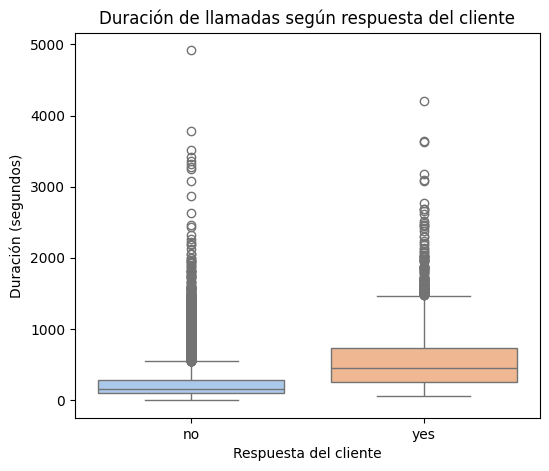

In [27]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='y', y='duration', palette='pastel')

plt.title('Duración de llamadas según respuesta del cliente')
plt.xlabel('Respuesta del cliente')
plt.ylabel('Duración (segundos)')
plt.show()


Aqui tambien observamos, que cuando la respuesta del cliente fue no, la llamada duro relativamente menos que cuando la respuesta fue si, esto sin tomar en cuenta los outliers.

Objetivo:
Analizar cómo las características personales y financieras del cliente influyen en la decisión de contratar un depósito a plazo

Variables a usar:
age, job, marital, education, default, housing, loan, y

Preguntas que busca responder:

¿Qué tipo de trabajo o nivel educativo tienen los clientes que más aceptan el depósito?

¿Influye la edad o el estado civil en la decisión?

¿Las personas con préstamos (loan, housing) tienen menor probabilidad de aceptar?

Propósito:
Identificar el perfil típico del cliente que acepta la oferta, para dirigir futuras campañas a ese segmento y mejorar la tasa de aceptación.

Correlación entre variables númericas

In [28]:
# correlación

corr = df.corr(numeric_only=True)

<Axes: >

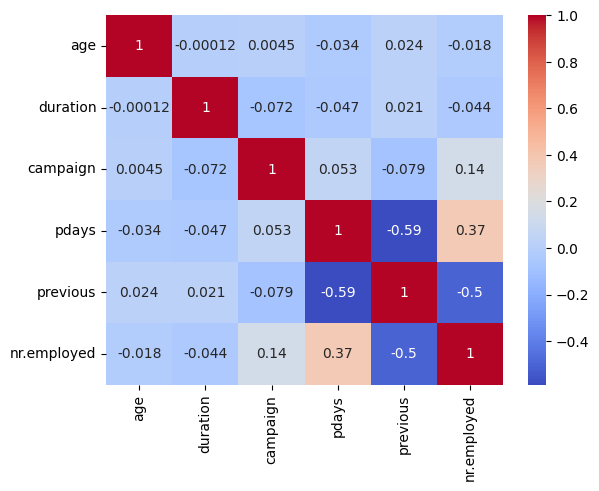

In [29]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

INSIGHTS DEL PROYECTO

**Insight 1:** ¿Que perfiles de clientes tienden mayormente a aceptar la campaña?

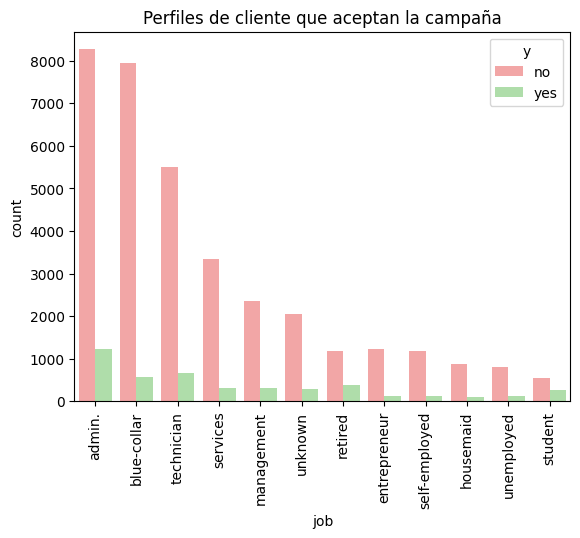

In [30]:
# Gráfico 1

mayor_a_menor = df['job'].value_counts().index

sns.countplot(data=df, x='job', hue='y', palette= ['#FF9999','#A8E6A1'], order=mayor_a_menor)
plt.xticks(rotation=90)
plt.title('Perfiles de cliente que aceptan la campaña')
plt.show()

# porcentaje de los que aceptan con respecto a su población

*En el siguiente gráfico podemos observar que aunque la mayor parte de contactos se concentra en ocupaciones como admi y blue-collar, estas no son necesariamente las más receptivas. Existen segmentos más pequeños, como podemos apreciar en el segundo gráfico, en donde hay mejor tasa de aceptación de los productos financieros brindados y que no están siendo explotados. En ese sentido, es importante dirigir futuras campañas hacia esos perfiles o equilibrar el número de personas contactadas por profesión con el fin de identificar si la tendencia hacia estos sectores sigue siendo positiva en cuanto al nivel de aceptación.**

Text(0, 0.5, 'Ocupación')

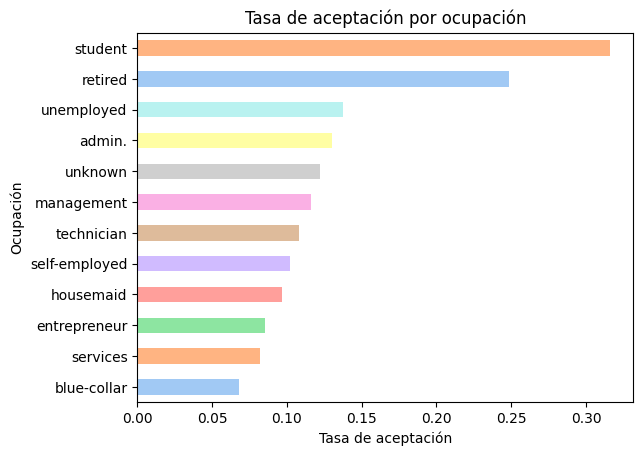

In [31]:
# Gráfico 2

tasa_aceptacion_job = (df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).sort_values())

colores= sns.color_palette('pastel', len(tasa_aceptacion_job))
tasa_aceptacion_job.plot(kind='barh',color=colores)
plt.title('Tasa de aceptación por ocupación')
plt.xlabel('Tasa de aceptación')
plt.ylabel('Ocupación')

**Insight 2:** Como influye la duracción de la llamada con respecto a la respuesta del usuario.

In [32]:
Q1 = df['duration'].quantile(0.25)
Q2 = df['duration'].quantile(0.5)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_duration = df[(df['duration'] < limite_inferior) | (df['duration'] > limite_superior)]
num_outliers = len(outliers_duration)
pct_outliers_duration = round(((num_outliers / len(df)) * 100),2)

print(f'El {pct_outliers_duration}% de los datos de la variable duration tienen outliers')

El 7.19% de los datos de la variable duration tienen outliers


***`Analizando los datos con outliers`***

/tmp/ipython-input-2152573017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='duration', palette='pastel')


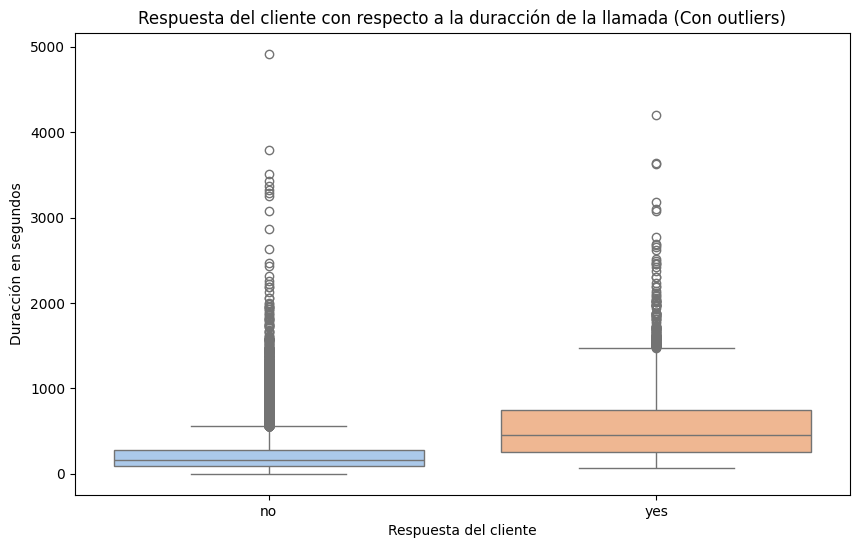

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='duration', palette='pastel')
plt.title('Respuesta del cliente con respecto a la duracción de la llamada (Con outliers)')
plt.xlabel('Respuesta del cliente')
plt.ylabel('Duracción en segundos')
plt.show()

# Revisar outliers de duration
# Significancia con los outliers con respecto a la variable en análisis

In [34]:
df.groupby("y")["duration"].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,35259.0,221.181457,207.074280,0.0,95.0,164.0,279.00,4918.0
yes,4486.0,552.933794,400.395082,63.0,254.0,449.0,740.75,4199.0


***Analizando los datos sin outliers***

In [35]:
Q1 = df['duration'].quantile(0.25)
Q2 = df['duration'].quantile(0.5)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_duration = df[(df['duration'] < limite_inferior) | (df['duration'] > limite_superior)]
outliers_duration

df_duration_sin_outliers= df[(df['duration'] > limite_inferior) & (df['duration'] < limite_superior)]
df_duration_sin_outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,5191.0,no
2,37.0,unknown,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,334.0,1,999,0,nonexistent,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1,999,0,nonexistent,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2,999,0,nonexistent,4963.6,no
41186,44.0,unknown,married,professional.course,no,no,no,cellular,nov,fri,442.0,1,999,0,nonexistent,4963.6,yes


/tmp/ipython-input-92066802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_duration_sin_outliers, x='y', y='duration', palette='pastel')


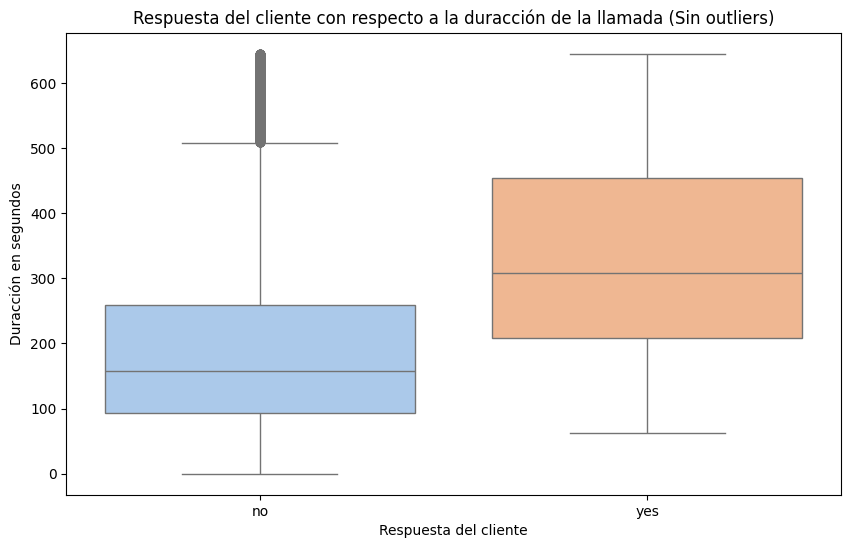

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_duration_sin_outliers, x='y', y='duration', palette='pastel')
plt.title('Respuesta del cliente con respecto a la duracción de la llamada (Sin outliers)')
plt.xlabel('Respuesta del cliente')
plt.ylabel('Duracción en segundos')
plt.show()

In [37]:
df_duration_sin_outliers.groupby('y')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,33869.0,192.193983,134.328558,0.0,93.0,158.0,259.00,645.0
yes,3020.0,332.750331,152.216478,63.0,208.0,307.5,454.25,645.0


/tmp/ipython-input-1642160519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_duration_sin_outliers, x='y', y='duration', palette='pastel', ax=axes[1])
/tmp/ipython-input-1642160519.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='duration', palette='pastel', ax=axes[0])


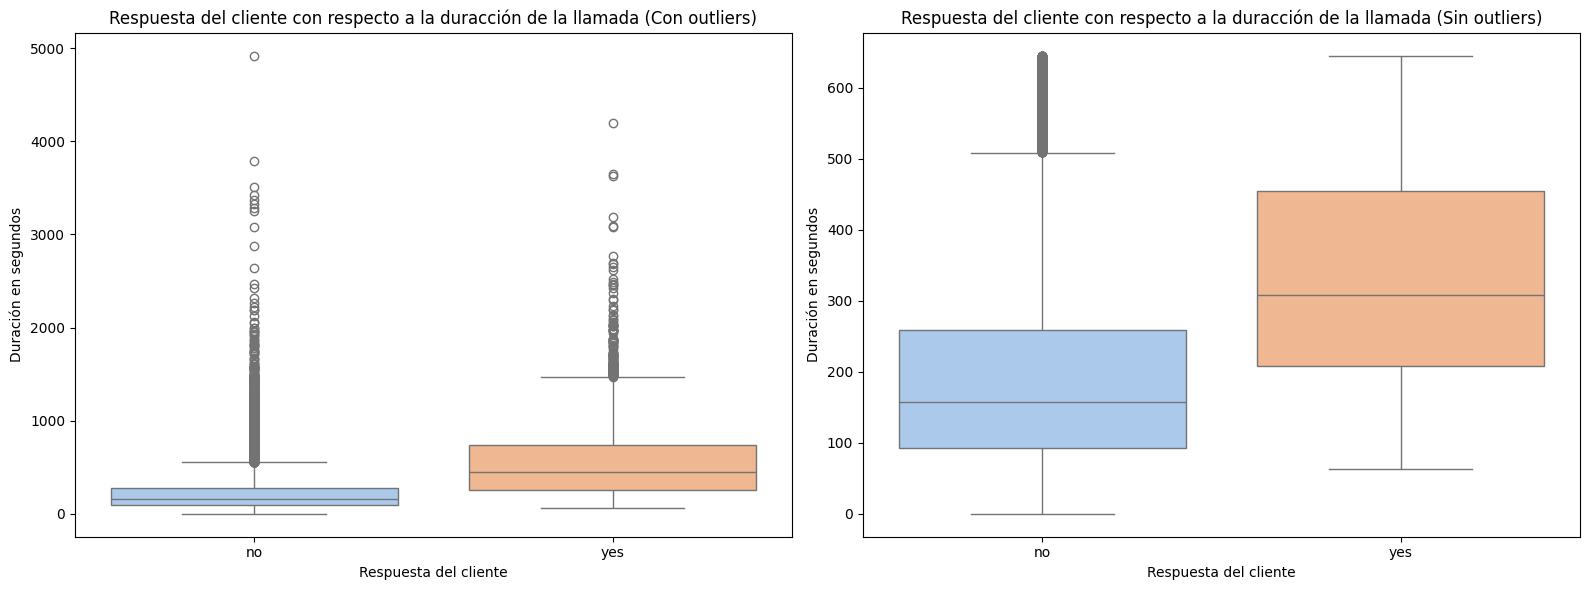

In [38]:
# Los dos gráficos juntos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Con outliers
sns.boxplot(data=df_duration_sin_outliers, x='y', y='duration', palette='pastel', ax=axes[1])
axes[1].set_title('Respuesta del cliente con respecto a la duracción de la llamada (Sin outliers)')
axes[1].set_xlabel('Respuesta del cliente')
axes[1].set_ylabel('Duración en segundos')

# Gráfico 2: Sin outliers
sns.boxplot(data=df, x='y', y='duration', palette='pastel', ax=axes[0])
axes[0].set_title('Respuesta del cliente con respecto a la duracción de la llamada (Con outliers)')
axes[0].set_xlabel('Respuesta del cliente')
axes[0].set_ylabel('Duración en segundos')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

/tmp/ipython-input-3844584068.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_aceptacion = df.groupby('rangos_minutos')['y'].apply(lambda x: (x=='yes').sum() / len(x) * 100)


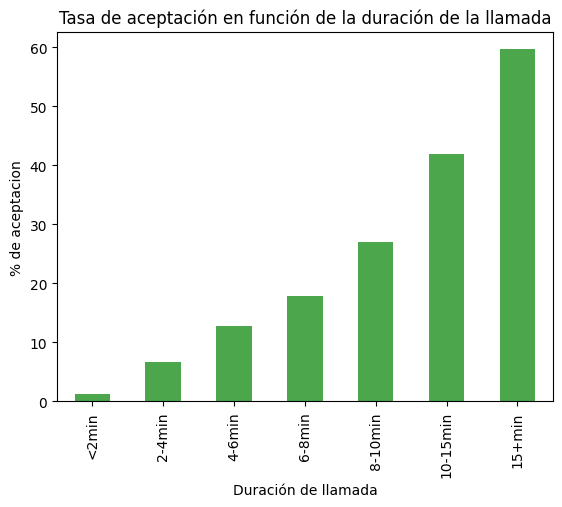

In [39]:
# Rangos de duración de llamada en base a una respuesta positiva

bins = [0, 120, 240, 360, 480, 600, 900, np.inf]
labels = ['<2min', '2-4min', '4-6min', '6-8min', '8-10min', '10-15min', '15+min']
df['rangos_minutos'] = pd.cut(df['duration'], bins=bins, labels=labels)

# Tasa de aceptación
tasa_aceptacion = df.groupby('rangos_minutos')['y'].apply(lambda x: (x=='yes').sum() / len(x) * 100)

# Grafico de barras para visualizar comportamiento
tasa_aceptacion.plot(kind='bar', color='green', alpha=0.7)
plt.title('Tasa de aceptación en función de la duración de la llamada')
plt.ylabel('% de aceptacion')
plt.xlabel('Duración de llamada')
plt.show()

*En base al análisis de las gráficas partiendo del nivel de aceptación en función de la duración de la llamada podemos identificar que mientrás existe una relación directa entre ambas variables, es decir, mientras más tiempo dure la llamada aumenta la probabilidad de obtener una respuesta positiva sobre el producto financiero ofertado en la campaña, sin embargo; no por ello podemos decir que toda llamada de larga duración va a terminar con la aceptación de nuestro servicio, más bien si analizamos los outliers podemos ver que existen llamadas de larga duración y que han tenido una respuesta negativa por parte del cliente. En ese sentido, es importante evaluar la operatividad del equipo de call center destinado a promocionar estas campañas vía telefónica con el fin de que sepan disuardir entre el interés de un cliente por adquirir o no adquirir nuestros productos*

**Insight 3:** Meses potenciales de aceptación de la campaña

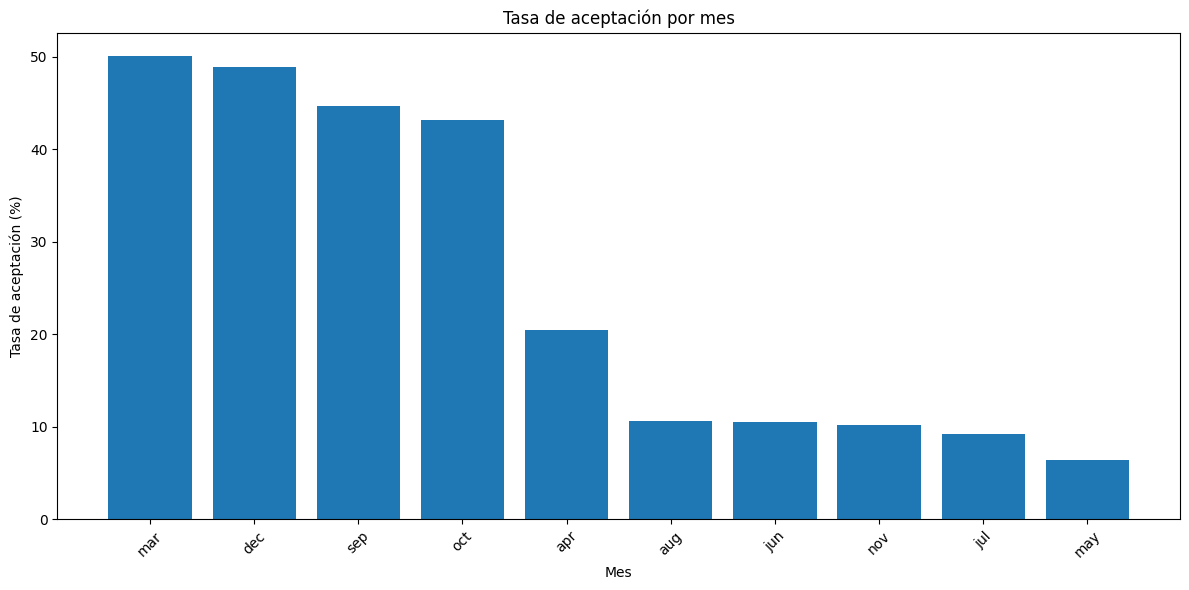

In [40]:
# Tasa de aceptación  y=si
meses_aceptación = df.groupby('month')['y'].apply(lambda x: (x=='yes').mean()*100).reset_index().sort_values(by="y", ascending= False)

plt.figure(figsize=(12,6))
plt.bar(meses_aceptación['month'], meses_aceptación['y'])
plt.title('Tasa de aceptación por mes')
plt.xlabel('Mes')
plt.ylabel('Tasa de aceptación (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revisar conjuntamente con otra variable


/tmp/ipython-input-3939080880.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


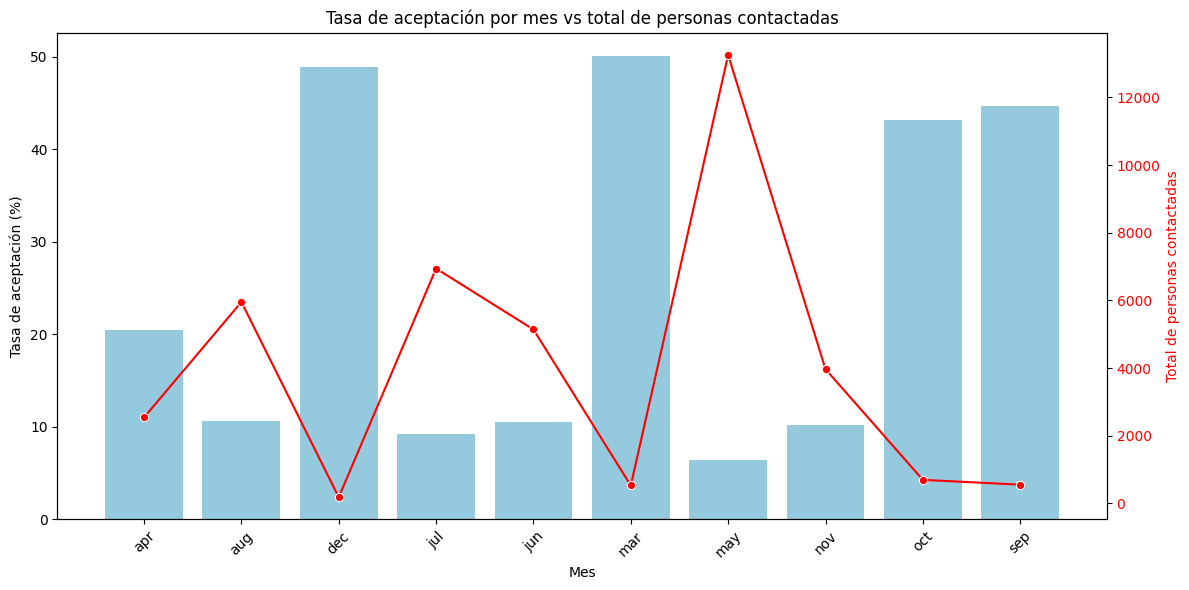

In [41]:
# Analizando más profundo de la variable month con respecto al total de personas contactadas

meses_aceptacion = df.groupby('month').agg(tasa_aceptacion=('y', lambda x: (x=='yes').mean()*100),total_personas_contactadas=('y','count')).reset_index()
meses_aceptacion

fig, ax1 = plt.subplots(figsize=(12,6))

# Tasa de aceptación
sns.barplot(data=meses_aceptacion, x='month', y='tasa_aceptacion', color='skyblue', ax=ax1)
ax1.set_ylabel('Tasa de aceptación (%)')
ax1.set_xlabel('Mes')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Total de personas contactadas en línea secundaria
ax2 = ax1.twinx()
sns.lineplot(data=meses_aceptacion, x='month', y='total_personas_contactadas', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Total de personas contactadas', color="red")
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Tasa de aceptación por mes vs total de personas contactadas')
plt.tight_layout()
plt.show()


In [42]:
meses_aceptacion

,month,tasa_aceptacion,total_personas_contactadas
0,apr,20.441119,2539
1,aug,10.651882,5952
2,dec,48.888889,180
3,jul,9.190435,6942
4,jun,10.546799,5139
5,mar,50.094877,527
6,may,6.412191,13256
7,nov,10.214376,3965
8,oct,43.227666,694
9,sep,44.646098,551


In [43]:
meses_aceptación

,month,y
5,mar,50.094877
2,dec,48.888889
9,sep,44.646098
8,oct,43.227666
0,apr,20.441119
1,aug,10.651882
4,jun,10.546799
7,nov,10.214376
3,jul,9.190435
6,may,6.412191


**Insight 4: Rango de edad con mayor probabilidad de éxito**

/tmp/ipython-input-2138128106.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_yes_rate = df.groupby("rango_age")["y"].apply(lambda x: (x == "yes").mean()*100)


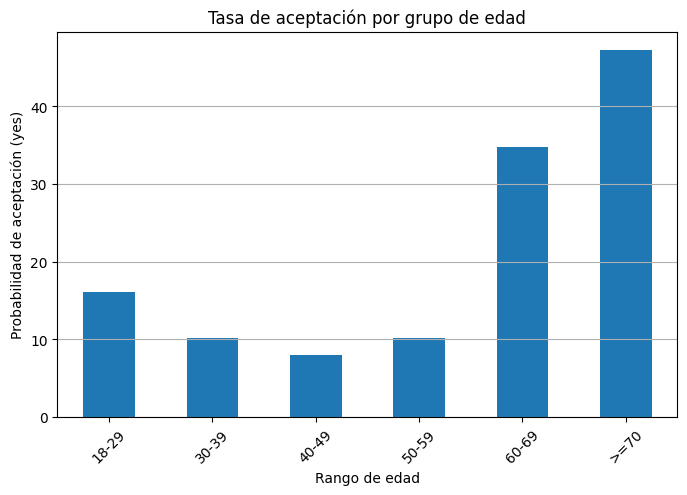

In [44]:
# ¿Existe un rango de edad con probabilidad significativamente mayor de aceptar?

bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '>=70']

df['rango_age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_yes_rate = df.groupby('rango_age')["y"].apply(lambda x: (x == 'yes').mean()*100)

plt.figure(figsize=(8,5))
age_yes_rate.plot(kind='bar')

plt.title('Tasa de aceptación por grupo de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Probabilidad de aceptación (yes)')
plt.xticks(rotation=45)
plt.grid(axis='y')

**Insight 5: Llamada por telefono presenta baja aceptacion**

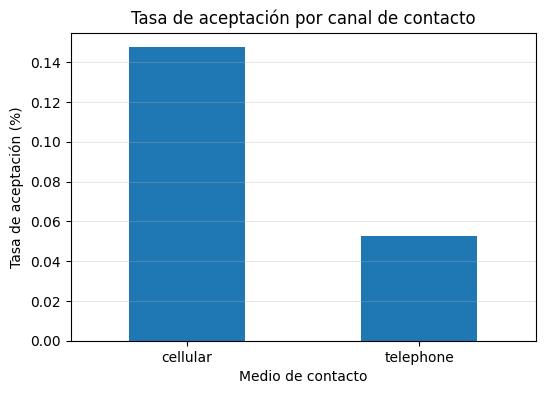

In [48]:
# Calcular la tasa de aceptación por canal de contacto
contactos = df.groupby('contact')['y'].apply(lambda x: (x == "yes").mean())

# Crear el gráfico
plt.figure(figsize=(6,4))
contactos.plot(kind='bar')

plt.title('Tasa de aceptación por canal de contacto')
plt.ylabel('Tasa de aceptación (%)')
plt.xlabel('Medio de contacto')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)

plt.show()

Insight 6: Mientras mas contactos previos existan, menos sera la tasa de aceptacion.

/tmp/ipython-input-2358688061.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_aceptacion_campaign = (df.groupby('campaign_cortes')['y'].apply(lambda x: (x == 'yes').mean()))


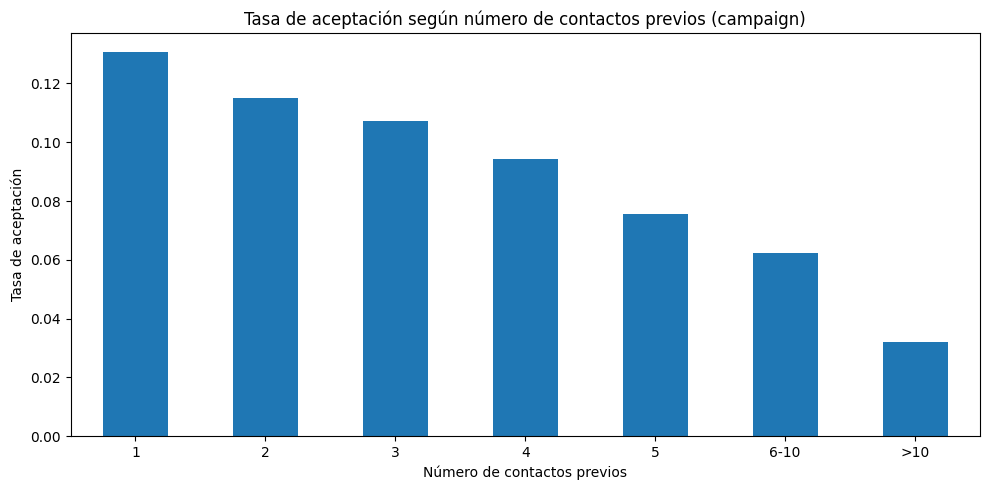

In [53]:
df['campaign_cortes'] = pd.cut(df['campaign'],
                            bins=[0,1,2,3,4,5,10,100],
                            labels=['1','2','3','4','5','6-10','>10'])

tasa_aceptacion_campaign = (df.groupby('campaign_cortes')['y'].apply(lambda x: (x == 'yes').mean()))

plt.figure(figsize=(10,5))
tasa_aceptacion_campaign.plot(kind='bar')
plt.title('Tasa de aceptación según número de contactos previos (campaign)')
plt.xlabel('Número de contactos previos')
plt.ylabel('Tasa de aceptación')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Reflexión final sobre posibles decisiones o acciones basadas en el análisis.

A partir del análisis realizado, es posible identificar oportunidades clave para mejorar la efectividad de futuras campañas financieras y optimizar el uso de los recursos de contacto. Los resultados muestran que:
* Aunque actualmente se concentra un gran número de llamadas en ciertos perfiles ocupacionales como admin y blue-collar, estos segmentos no siempre son los más receptivos. Existen grupos más pequeños con tasas de aceptación significativamente más altas que no están siendo aprovechados. Por ello, es recomendable redirigir parte del esfuerzo comercial hacia esos perfiles y, en paralelo, equilibrar la distribución de contactos por profesión para validar si estas tendencias se mantienen de forma consistente.

* Por otro lado, se observa una relación directa entre la duración de la llamada y la probabilidad de aceptación del producto financiero, este comportamiento no es absoluto. Cuando la duración de la llamada es mayor la tasa de aceptación aumenta. Observando que por ejemplo, cuando la llamda dura más de 15 minutos la tasa de aceptacion es mayor al 40%.

* El análisis temporal muestra que meses como mayo, agosto, julio presentan tasas de aceptación superiores al 40% aun con volúmenes de contacto relativamente bajos. Esto sugiere un potencial de aprovechamiento estacional que no está siendo explotado: incrementar el número de contactos en estos meses podría traducirse en una mayor conversión sin necesidad de modificar la estrategia general del producto.

* En términos demográficos, los rangos de edad entre 18–29 años, así como los mayores de 60 y especialmente los mayores de 70 años, muestran una mayor disposición a aceptar las ofertas. Estos segmentos representan una oportunidad para campañas más focalizadas, siempre considerando las necesidades y características particulares de cada grupo.

* Además, se detectó que el canal telefónico tiene tasas de aceptación considerablemente más bajas en comparación con otro medio (celular), lo que refuerza la importancia de evaluar alternativas de contacto más efectivas o complementar las llamadas con comunicaciones previas por otros canales.

* Finalmente, el análisis confirma que la persistencia excesiva es contraproducente: mientras más veces se contacta a una persona dentro de una misma campaña, menor es la probabilidad de que acepte. Esto refuerza la necesidad de establecer límites claros en el número de intentos por cliente y aplicar estrategias de segmentación más precisas que reduzcan la dependencia del volumen.

En conjunto, estos insights ofrecen una base sólida para rediseñar las campañas futuras, optimizar recursos, aumentar la probabilidad de aceptación y mejorar la experiencia del cliente mediante interacciones más relevantes y oportunas.